In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np

1


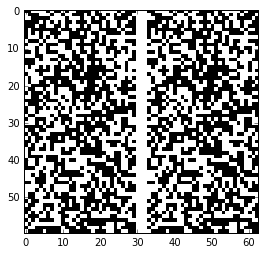

In [2]:
tw = 30
th = 2*tw
right = np.random.randint(2, size=[th,tw])
divider = np.zeros((th, 3))
left = right.copy()

#add pop-out
x, y, w, h = tw/4, th/4, tw/2, th/2
shift = w/20 + 1
print shift
shading = 0
right[y:y+h,x-shift:x+w-shift] = left[y:y+h,x:x+w] + shading
left[y:y+h,x:x+w] += shading
# left[y:y+h,x:x+w] +=1
#  = np.ones((30,30)) #np.random.randint(2, size=[10,20])

combo = np.concatenate((left, divider, right), axis = 1)
plt.imshow(combo, cmap='Greys',  interpolation='nearest', aspect='equal')

5.0
25


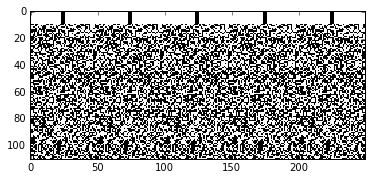

In [63]:
tw = 50
th = int(2*tw)

panels = []

bkg = np.random.randint(2, size=[th,tw])
panels.append(bkg)
# divider = np.zeros((th, 3))

# lines = np.zeros_like(bkg)
# for i in range(lines.shape[1]):
#     lines[:,i] = i%2
# bkg = lines 

#make depth mask
fringe = th/3
shift = tw/10
shading = 1
dmask = np.zeros( (bkg.shape[0],bkg.shape[0]*4) )
dmask[fringe:-fringe,fringe:-fringe] =  -shift #( -1 * np.cumsum(np.ones((h,w)),axis = 0) / 5 ).astype(int)
print np.max(np.abs(dmask))

# #create pop out panels
for i in range(4):
    target = bkg.copy()
    dmask_slice = dmask[:,i*tw:i*tw+tw]
    for i in range(target.shape[1]):
        row_i = ( np.cumsum(np.ones(target.shape[0])) - 1).astype(int)
        col_i = ( i + dmask_slice[:,i] ).astype(int)
        target[row_i,col_i] = bkg[:,i]
    panels.append(target)

combo = np.concatenate((panels), axis = 1)
one_panel = np.zeros((th/10,tw))
print one_panel.shape[1]/2
fixation_square_width = one_panel.shape[1]/2 + np.array(range(-one_panel.shape[0]/8, one_panel.shape[0]/8))
one_panel[:,fixation_square_width] = np.max(combo)
legend = one_panel
for i in range(len(panels) - 1):
    legend = np.concatenate((legend,one_panel),axis=1)

rds = np.concatenate((legend, combo), axis = 0)
plt.imshow(rds, cmap='Greys',  interpolation='nearest', aspect='equal')

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([0,1])
a[np.array([0,1]),np.array([0,1])] = 3
print np.array([0,1]).shape
print a